In [1]:
#Name: Chaeyoon Kim
#City Email: Chaeyoon.Kim@city.ac.uk
#Machine Learning Lecture week2 PPT4 CurveFitting (Arthur S. d'Avila Garcez, a.garcez@city.ac.uk)
#Chris Bishop, "Pattern Recognition and Machine Learning", Springer, 2006 (https://g.co/kgs/CsLSX8)

import numpy as np
import matplotlib.pyplot as plt

## A simple example: fitting a polynomial

A simple example is to use a polynomial. I am trying to fit and interpolate a curve on the blue dots that's no longer Gaussian through a green curve line function. In order to predict, I am going to approximate the function with a polynomial. I want to account why the blue dots are not exactly on top of the curve and here I call a loss function to fit a curve when the dots have noise and errors.

To determine the best fitting polynomial, we need to define a loss function. This function will measure the error between the predicted values and the blue dots. One example of a loss function is the sum of squared errors.

$$
y(x, \mathbf{w}) = w_0 + w_1x + w_2x^2 + \dotsc + w_Mx^M = \sum_{j=0}^M w_jx^j
$$
$$
\mathbf{x} = \begin{bmatrix} 1 \\ x \\ x^2 \\ \vdots \\ x_M \end{bmatrix}, \mathbf{w} = \begin{bmatrix} w_0 \\ w_1 \\ w_2 \\ \vdots \\ w_M \end{bmatrix}
$$

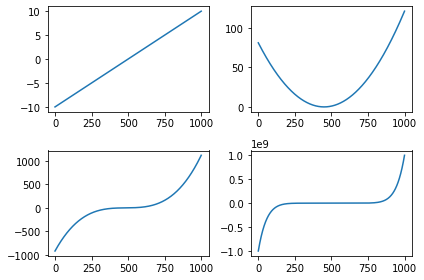

In [2]:
x = np.linspace(-10, 10, 1000)

fig, axes = plt.subplots(2, 2)
ax0, ax1, ax2, ax3 = axes.flatten()

ax0.plot(x)
ax1.plot(x**2 + 2*x + 1)
ax2.plot(x**3 + x**2 + 2*x + 1)
ax3.plot(x**9 + 1)

fig.tight_layout()
plt.show()

## Curve fitting

$$
E(\mathbf{w}) = \frac{1}{2} \sum_{n=1}^n \left\{y(x_n, \mathbf{w}) - t_n \right\}^2
$$
When I have a loss function $E$, my aim is to find $w$ to make reduce the distance between $y$ (predicted values) and the actual value $t$.

To do this, we find when the rate of change of the loss function is zero
$$
\frac{\text{d}E(\mathbf{w})}{\text{d}\mathbf{w}} = \mathbf{0}
$$

## Overfitting and Model Selection

When we consider the different values of $M$, and try to optimise the problem so minimize the loss function for each selected value of $M$, we are doing something called Model Selection. 

To do model selection, you need to have a training set and a validation set. For each value of M, assess the training error and the validation error. As M increases, the training error will decrease because we can fit more precisely to the training data. The problem with fitting too precisely to the training data is that we are learning the "data" not the underlying model. If M is large enough, the validation error will start to increase instead of decreasing, this is called **overfitting**.

Therefore we choose the best M so that we have the lowest validation error. 

## A simple way to reduce model complexity

To prevent overfitting, I can add an additional complex parameter at the end of the loss function. This method is called as regularization.

A penalised loss function $$
\tilde{E}(\mathbf{w}) = \frac{1}{2} \sum_{n=1}^n \left\{y(x_n, \mathbf{w}) - t_n \right\}^2 + \frac{\lambda}{2} \mid\mid{\mathbf{w}}\mid\mid^2
$$

## Using a validation set

In practice, divide the total dataset into three subsets: <br>
- Training data (~80%)
- Validation data (~20%)
- Test data